<a href="https://colab.research.google.com/github/laurenneal/capstone-visual-neuroscience/blob/main/scikit_test_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
#imports
import pandas as pd
import os
import random
import seaborn as sns

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

In [5]:
#uncomment to pull data that's already been tagged train/test/val

# # pull train and test data from the folder
# root = '/content/drive/MyDrive/DS6011_Capstone_VisualNeuroscience/Seeded_CNMF/Extracted_Features/'
# folder = '5_frames_stim1/'
# f_names = os.listdir(root + folder)

# cols = pd.read_csv(root + folder + f_names[0]).columns

# df_train = pd.DataFrame(columns=cols)
# df_test = pd.DataFrame(columns=cols)
# df_val = pd.DataFrame(columns=cols)

# for f in f_names:
#   df = pd.read_csv(root + folder + f)
#   if 'train' in f.split('_')[-1]:
#     df_train = pd.concat([df_train, df])
#   if 'test' in f.split('_')[-1]:
#     df_test = pd.concat([df_test, df])
#   if 'val' in f.split('_')[-1]:
#     df_val = pd.concat([df_val, df])

In [6]:
# pull all data from folder
root = '/content/drive/MyDrive/DS6011_Capstone_VisualNeuroscience/Seeded_CNMF/Extracted_Features/'
folder = '5_frames_stim1/'
f_names = os.listdir(root + folder)

paths = [root + folder + f for f in f_names if "TrainTest" in f] #only train/test
print(paths)

df = pd.concat(map(pd.read_csv, paths), ignore_index=True)
df.head()

['/content/drive/MyDrive/DS6011_Capstone_VisualNeuroscience/Seeded_CNMF/Extracted_Features/5_frames_stim1/TrainTest_RAW_extracted_data_features.csv']


,Unnamed: 0,stack,label,roi,frame,movie_ID,resp,stim1,stim2,stim3,...,relation_stim1_PS-PS,relation_type_stim6,relation_stim6,relation_stim6_+5,relation_type_stim6_+5,relation_stim6_NS-NS,relation_stim6_NS-PS,relation_stim6_PS-NS,relation_stim6_PS-PS,frame_group
0,0,1,tm9,1,0,210728_0,0.119422,1.827970,-0.668979,-1.323903,...,0.0,PS,6.131515e-15,1.709783e-19,NS,0.0,0.0,1.048356e-33,0.0,1
1,1,1,tm9,1,1,210728_0,0.065380,0.676591,1.133205,0.209498,...,0.0,PS,1.404623e-10,2.707063e-14,NS,0.0,0.0,3.802402e-24,0.0,1
2,2,1,tm9,1,2,210728_0,0.036917,-1.276472,-0.881429,1.220991,...,0.0,PS,7.426788e-10,2.085457e-13,NS,0.0,0.0,1.548825e-22,0.0,1
3,3,1,tm9,1,3,210728_0,0.156975,-1.676237,0.505447,1.208871,...,0.0,PS,1.971844e-08,9.885126e-13,NS,0.0,0.0,1.949192e-20,0.0,1
4,4,1,tm9,1,4,210728_0,0.195883,-1.351235,-0.832430,1.249990,...,0.0,PS,3.232196e-08,1.051521e-12,NS,0.0,0.0,3.398724e-20,0.0,1


In [7]:
#get the holdout df
paths = [root + folder + f for f in f_names if "HOLDOUT" in f]
print(paths)

holdout_df = pd.concat(map(pd.read_csv, paths), ignore_index=True)
holdout_df.head()

['/content/drive/MyDrive/DS6011_Capstone_VisualNeuroscience/Seeded_CNMF/Extracted_Features/5_frames_stim1/HOLDOUT_RAW_extracted_data_features.csv']


,Unnamed: 0,stack,label,roi,frame,movie_ID,resp,stim1,stim2,stim3,...,relation_stim1_PS-PS,relation_type_stim6,relation_stim6,relation_stim6_+5,relation_type_stim6_+5,relation_stim6_NS-NS,relation_stim6_NS-PS,relation_stim6_PS-NS,relation_stim6_PS-PS,frame_group
0,0,1,t5,8,1,210809_2,0.217502,0.276790,0.776442,-0.001301,...,0.0,PS,7.216378e-11,2.790717e-16,NS,0.0,0.0,2.013887e-26,0.0,1
1,1,1,t5,8,2,210809_2,0.416828,0.276790,0.776442,-0.001301,...,0.0,PS,1.653759e-08,9.894077e-13,NS,0.0,0.0,1.636242e-20,0.0,1
2,2,1,t5,8,3,210809_2,0.354376,-0.551717,-1.050625,-1.773261,...,0.0,PS,1.354199e-07,2.692603e-11,NS,0.0,0.0,3.646319e-18,0.0,1
3,3,1,t5,8,4,210809_2,0.502063,-1.104055,-1.343779,-1.581956,...,0.0,PS,8.086540e-07,2.216457e-10,NS,0.0,0.0,1.792346e-16,0.0,1
4,4,1,t5,8,5,210809_2,0.332470,-1.104055,0.776442,-0.001301,...,0.0,PS,5.285532e-09,6.543285e-14,NS,0.0,0.0,3.458474e-22,0.0,1


In [8]:
df.columns

Index(['Unnamed: 0', 'stack', 'label', 'roi', 'frame', 'movie_ID', 'resp',
       'stim1', 'stim2', 'stim3', 'stim4', 'stim5', 'stim6', 'stim7', 'stim8',
       'stim2_feature', 'stim3_feature', 'stim5_feature', 'stim4_feature',
       'stim7_feature', 'stim8_feature', 'relation_type_stim1',
       'relation_stim1', 'relation_stim1_+5', 'relation_type_stim1_+5',
       'relation_stim1_NS-NS', 'relation_stim1_NS-PS', 'relation_stim1_PS-NS',
       'relation_stim1_PS-PS', 'relation_type_stim6', 'relation_stim6',
       'relation_stim6_+5', 'relation_type_stim6_+5', 'relation_stim6_NS-NS',
       'relation_stim6_NS-PS', 'relation_stim6_PS-NS', 'relation_stim6_PS-PS',
       'frame_group'],
      dtype='object')

In [9]:
#add a unique roi id to the table

#use this to average each movie/roi instead of stack/roi
#df['movie'] = df['filename'].str.slice(0,8)
#df['roi_ID_movie'] = df['movie'].astype(str) + '_' + df['roi'].astype(str)

#use this to group by stack/roi/frame group
df['roi_ID'] = df['movie_ID'].astype(str) + '_' + df['roi'].astype(str)
df['roi_group_ID'] = df['movie_ID'].astype(str) + '_' + df['roi'].astype(str) + '_' + df['frame_group'].astype(str)

#same for holdout data
holdout_df['roi_ID'] = holdout_df['movie_ID'].astype(str) + '_' + holdout_df['roi'].astype(str)
holdout_df['roi_group_ID'] = holdout_df['movie_ID'].astype(str) + '_' + holdout_df['roi'].astype(str) + '_' + holdout_df['frame_group'].astype(str)


df.head()

,Unnamed: 0,stack,label,roi,frame,movie_ID,resp,stim1,stim2,stim3,...,relation_stim6,relation_stim6_+5,relation_type_stim6_+5,relation_stim6_NS-NS,relation_stim6_NS-PS,relation_stim6_PS-NS,relation_stim6_PS-PS,frame_group,roi_ID,roi_group_ID
0,0,1,tm9,1,0,210728_0,0.119422,1.827970,-0.668979,-1.323903,...,6.131515e-15,1.709783e-19,NS,0.0,0.0,1.048356e-33,0.0,1,210728_0_1,210728_0_1_1
1,1,1,tm9,1,1,210728_0,0.065380,0.676591,1.133205,0.209498,...,1.404623e-10,2.707063e-14,NS,0.0,0.0,3.802402e-24,0.0,1,210728_0_1,210728_0_1_1
2,2,1,tm9,1,2,210728_0,0.036917,-1.276472,-0.881429,1.220991,...,7.426788e-10,2.085457e-13,NS,0.0,0.0,1.548825e-22,0.0,1,210728_0_1,210728_0_1_1
3,3,1,tm9,1,3,210728_0,0.156975,-1.676237,0.505447,1.208871,...,1.971844e-08,9.885126e-13,NS,0.0,0.0,1.949192e-20,0.0,1,210728_0_1,210728_0_1_1
4,4,1,tm9,1,4,210728_0,0.195883,-1.351235,-0.832430,1.249990,...,3.232196e-08,1.051521e-12,NS,0.0,0.0,3.398724e-20,0.0,1,210728_0_1,210728_0_1_1


In [10]:
# #scale the raw response

# df['resp_scaled'] = df['resp'] /df['resp'].abs().max() #just divide by the max value

# #TEMPORARILY distribute the scaled response into the directional columns - probably needs to be more involved than this
# directional_cols = [col for col in df.columns if 'direction' in col]


# for col in directional_cols:
#   df[col] = df['resp_scaled'] * df[col]

# df.head()

In [11]:
#average each df by roi/frame group
df = df.groupby(['roi_group_ID', 'label', 'roi_ID']).mean().reset_index()
holdout_df = holdout_df.groupby(['roi_group_ID', 'label', 'roi_ID']).mean().reset_index()

df.shape

(930, 35)

In [12]:
# #playing with visualizing the data
# #single direction of the stimulus vs the scaled response seems to separate t5 in our 10-frame windowed table
# sns.scatterplot(x=df['direction_up'], y=df['direction_down'], hue=df['label'])
# plt.legend()

In [13]:
#train test split by roi_ID so that no single roi is included in the training and testing data
#Right now the split is random

#get a list of the unique rois
rois = df.drop_duplicates('roi_group_ID')[['roi_group_ID', 'label']]

#treat them like the roi and labels are their own dataset
X = np.array(rois['roi_group_ID'])
y = np.array(rois['label'])


#split into training and testing - returns the indexes
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=0) #30% testing
for train_index, test_index in sss.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)

#These are lists of the rois to be included in each split, not the actual data
X_train_rois, X_test_rois = X[train_index], X[test_index]
y_train, y_test = y[train_index], y[test_index]


TRAIN: [539 915 798 693 492 914 749 452 708 583 183 771 299 858 163 680 863 880
 467 869 136 347 243 384 204 117 342  60 824 305 307 758 122 917 338 244
 401 463 252 499 750 278 590  39 201 316 297 173 604 701 699 769 270 598
 431 900 919 286 187 239 481 705 513 772 847 309 451 485 827 688 143 445
 538 345 471 725 684 526 230 925 640 766 904 165 300 837 350 649 390 533
 655 834  42 415 418  10 866 240 853 274 911 409   1 506 326 903 116 602
 170 560  53  51 367 227  41 142 532 555 878 194 774 313 358 261 734 381
 618 707 354 635 664 828 256 351 613 505 642 498 860 145 835 279 441 628
 249 557 795  37 620 690  26 228 213 308 638 454 563 511 198 301 811 389
 717 218 482 202 631 802 178 380 800 692 319 406  38 251 522 846 385 310
  43  11 912 104  82  21 317 312 214 397 703 775 709 189 340 448  62 135
 637 253 343 666 154   0 566 450 842 237 421 248 332 657 883 615   7 459
 292 435 830 785 778 791 503 691 836 704 711 392  15 290 428  72 780  71
 208 177 877 414 906 818  76 376 552 119 417

In [15]:
#get the columns holding the data we'll use in the model
data_cols = [col for col in df.columns if ('feature' in col or 'relation_stim1_' in col or 'relation_stim6_' in col) and '+5' not in col]
data_cols

['stim2_feature',
 'stim3_feature',
 'stim5_feature',
 'stim4_feature',
 'stim7_feature',
 'stim8_feature',
 'relation_stim1_NS-NS',
 'relation_stim1_NS-PS',
 'relation_stim1_PS-NS',
 'relation_stim1_PS-PS',
 'relation_stim6_NS-NS',
 'relation_stim6_NS-PS',
 'relation_stim6_PS-NS',
 'relation_stim6_PS-PS']

In [67]:
def train_test_scale(df, data_cols):
  """
  Function to take in the different df's and return training and testing data
  Useful to try different time windows without tracking a bunch of variables
  """

  #use the roi_id's as indexes to split train and test from our full df
  X_train = df.query('roi_group_ID in @X_train_rois')[data_cols] 
  y_train = df.query('roi_group_ID in @X_train_rois')['label'] 

  X_test = df.query('roi_group_ID in @X_test_rois')[data_cols] 
  y_test = df.query('roi_group_ID in @X_test_rois')['label']     

  X_holdout = holdout_df[data_cols]
  y_holdout = holdout_df['label']


  #Scale based on X_train to avoid data leakage
  scaler = StandardScaler() 
  scaler.fit(X_train)
  X_train = scaler.transform(X_train)  
  # apply same transformation to test data
  X_test = scaler.transform(X_test)

  scaler = StandardScaler()
  scaler.fit(X_holdout)
  X_holdout = scaler.transform(X_holdout)

  return X_train, y_train, X_test, y_test, X_holdout, y_holdout

# try models based on 5-frame stim1 window

In [68]:
X_train, y_train, X_test, y_test, X_holdout, y_holdout = train_test_scale(df, data_cols) 

In [69]:
#multilayer perceptron (neural net)
model = MLPClassifier(hidden_layer_sizes=(10, 5), activation='relu', solver='adam', max_iter=100000, verbose = False, tol = .00001)
model.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(10, 5), max_iter=100000, tol=1e-05)

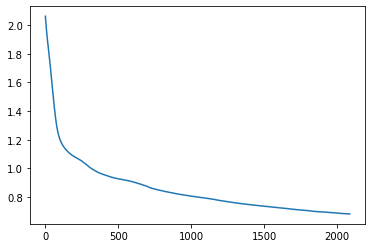

In [70]:
plt.plot(model.loss_curve_)

In [71]:
#return the predicted classes and probabilities
preds_prob = model.predict_proba(X_test)
preds = model.predict(X_test)
print(model.classes_)

['t5' 'tm1' 'tm2' 'tm4' 'tm9']


Macro results: {'precision': 0.4946278124690256, 'recall': 0.4165524813350901, 'f1-score': 0.44029974032094926, 'support': 279}
Accuracy: 0.5770609318996416
balanced accuracy: 0.45559014690205785


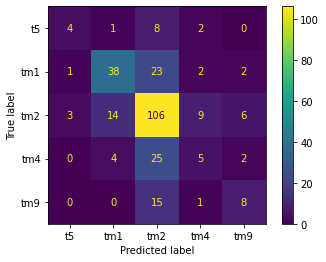

In [72]:
report = classification_report(y_test,preds, output_dict=True)
print(f"Macro results: {report['macro avg']}")
print(f"Accuracy: {report['accuracy']}")
print(f"balanced accuracy: {(report['macro avg']['precision'] + report['macro avg']['recall']) /2}")


ConfusionMatrixDisplay.from_predictions(y_test, preds)

Macro results: {'precision': 0.6026315789473684, 'recall': 0.44030303030303025, 'f1-score': 0.4573178471693323, 'support': 89}
Accuracy: 0.6067415730337079
balanced accuracy: 0.5214673046251993


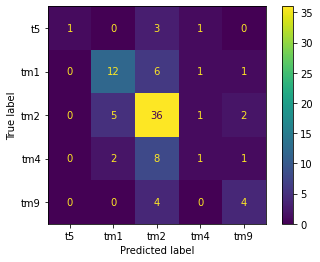

In [73]:
#Roll the predictions up to the cell level taking the average prediction for each class

model_test_df = df.query('roi_group_ID in @X_test_rois')

model_test_df[['t5', 'tm1', 'tm2', 'tm4', 'tm9']] = preds_prob
model_test_df = model_test_df.groupby(['roi_ID', 'label']).mean().reset_index()

model_test_df['max_pred'] = model_test_df[['t5', 'tm1', 'tm2', 'tm4', 'tm9']].idxmax(axis=1)


report = classification_report(model_test_df['label'],model_test_df['max_pred'], output_dict=True)
print(f"Macro results: {report['macro avg']}")
print(f"Accuracy: {report['accuracy']}")
print(f"balanced accuracy: {(report['macro avg']['precision'] + report['macro avg']['recall']) /2}")

ConfusionMatrixDisplay.from_predictions(model_test_df['label'],model_test_df['max_pred'])

Macro results: {'precision': 0.2333333333333333, 'recall': 0.275, 'f1-score': 0.24155844155844158, 'support': 17}
Accuracy: 0.5294117647058824
balanced accuracy: 0.25416666666666665


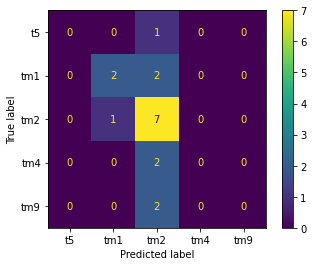

In [74]:
#testing predictions on holdout data

preds_prob = model.predict_proba(X_holdout)
#Roll the predictions up to the cell level taking the average prediction for each class

model_test_df = holdout_df

model_test_df[['t5', 'tm1', 'tm2', 'tm4', 'tm9']] = preds_prob
model_test_df = model_test_df.groupby(['roi_ID', 'label']).mean().reset_index()

model_test_df['max_pred'] = model_test_df[['t5', 'tm1', 'tm2', 'tm4', 'tm9']].idxmax(axis=1)

report = classification_report(model_test_df['label'],model_test_df['max_pred'], output_dict=True)
print(f"Macro results: {report['macro avg']}")
print(f"Accuracy: {report['accuracy']}")
print(f"balanced accuracy: {(report['macro avg']['precision'] + report['macro avg']['recall']) /2}")

ConfusionMatrixDisplay.from_predictions(model_test_df['label'],model_test_df['max_pred'])

In [75]:
#knn
model = KNeighborsClassifier(3)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

0.6021505376344086
Macro results: {'precision': 0.5397245963912631, 'recall': 0.4859925340360123, 'f1-score': 0.4999145257052177, 'support': 279}
Accuracy: 0.6021505376344086
balanced accuracy: 0.5128585652136377


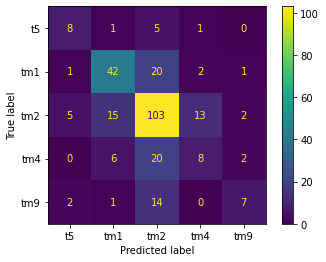

In [76]:
print(model.score(X_test, y_test)) 
preds_prob = model.predict_proba(X_test)
preds = model.predict(X_test)

report = classification_report(y_test,preds, output_dict=True)
print(f"Macro results: {report['macro avg']}")
print(f"Accuracy: {report['accuracy']}")
print(f"balanced accuracy: {(report['macro avg']['precision'] + report['macro avg']['recall']) /2}")


ConfusionMatrixDisplay.from_predictions(y_test, preds)

Macro results: {'precision': 0.6492974238875878, 'recall': 0.548939393939394, 'f1-score': 0.5782399626517274, 'support': 89}
Accuracy: 0.6629213483146067
balanced accuracy: 0.5991184089134909


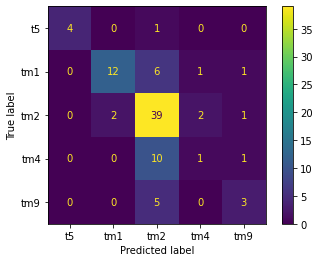

In [77]:
#Roll the predictions up to the cell level taking the average prediction for each class

model_test_df = df.query('roi_group_ID in @X_test_rois')

model_test_df[['t5', 'tm1', 'tm2', 'tm4', 'tm9']] = preds_prob
model_test_df = model_test_df.groupby(['roi_ID', 'label']).mean().reset_index()

model_test_df['max_pred'] = model_test_df[['t5', 'tm1', 'tm2', 'tm4', 'tm9']].idxmax(axis=1)


report = classification_report(model_test_df['label'],model_test_df['max_pred'], output_dict=True)
print(f"Macro results: {report['macro avg']}")
print(f"Accuracy: {report['accuracy']}")
print(f"balanced accuracy: {(report['macro avg']['precision'] + report['macro avg']['recall']) /2}")

ConfusionMatrixDisplay.from_predictions(model_test_df['label'],model_test_df['max_pred'])

Macro results: {'precision': 0.2564102564102564, 'recall': 0.3, 'f1-score': 0.2666666666666667, 'support': 17}
Accuracy: 0.5882352941176471
balanced accuracy: 0.2782051282051282


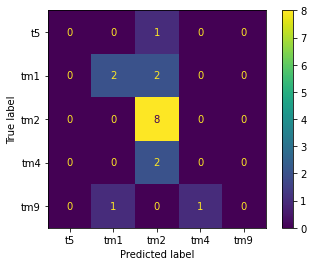

In [78]:
#testing predictions on holdout data

preds_prob = model.predict_proba(X_holdout)
#Roll the predictions up to the cell level taking the average prediction for each class

model_test_df = holdout_df

model_test_df[['t5', 'tm1', 'tm2', 'tm4', 'tm9']] = preds_prob
model_test_df = model_test_df.groupby(['roi_ID', 'label']).mean().reset_index()

model_test_df['max_pred'] = model_test_df[['t5', 'tm1', 'tm2', 'tm4', 'tm9']].idxmax(axis=1)

report = classification_report(model_test_df['label'],model_test_df['max_pred'], output_dict=True)
print(f"Macro results: {report['macro avg']}")
print(f"Accuracy: {report['accuracy']}")
print(f"balanced accuracy: {(report['macro avg']['precision'] + report['macro avg']['recall']) /2}")

ConfusionMatrixDisplay.from_predictions(model_test_df['label'],model_test_df['max_pred'])

Right now this is outputting results on the testing data, not the holdout set

Nearest Neighbors: score: 0.6021505376344086
Macro results: {'precision': 0.6492974238875878, 'recall': 0.548939393939394, 'f1-score': 0.5782399626517274, 'support': 89}
Accuracy: 0.6629213483146067
balanced accuracy: 0.5991184089134909


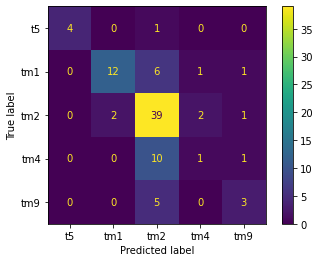

Linear SVM: score: 0.5913978494623656
Macro results: {'precision': 0.4891701828410689, 'recall': 0.32, 'f1-score': 0.3201009251471826, 'support': 89}
Accuracy: 0.5955056179775281
balanced accuracy: 0.40458509142053445


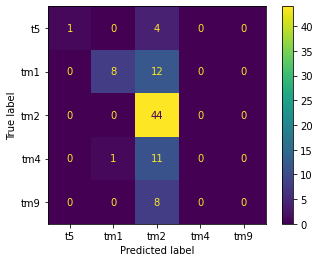

RBF SVM: score: 0.5985663082437276
Macro results: {'precision': 0.48274428274428277, 'recall': 0.35090909090909095, 'f1-score': 0.35570621468926555, 'support': 89}
Accuracy: 0.6179775280898876
balanced accuracy: 0.4168266868266869


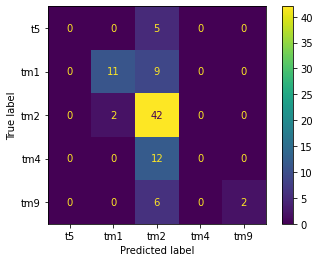

Gaussian Process: score: 0.6129032258064516
Macro results: {'precision': 0.2895495495495496, 'recall': 0.3254545454545455, 'f1-score': 0.2943341404358354, 'support': 89}
Accuracy: 0.6292134831460674
balanced accuracy: 0.30750204750204757


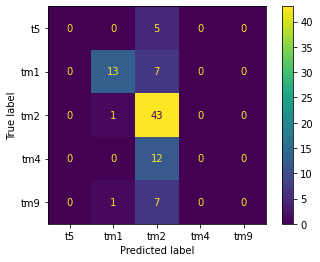

Decision Tree: score: 0.6523297491039427
Macro results: {'precision': 0.6907017543859648, 'recall': 0.5806060606060606, 'f1-score': 0.6200757575757576, 'support': 89}
Accuracy: 0.7191011235955056
balanced accuracy: 0.6356539074960127


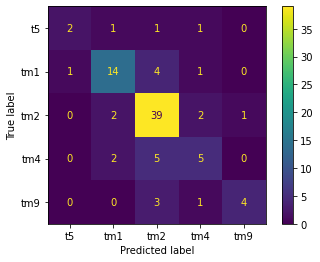

Random Forest: score: 0.7240143369175627
Macro results: {'precision': 0.7863799283154121, 'recall': 0.5483333333333333, 'f1-score': 0.5968830309048779, 'support': 89}
Accuracy: 0.7528089887640449
balanced accuracy: 0.6673566308243728


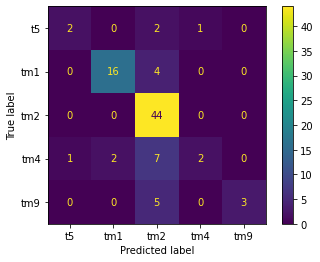

Neural Net: score: 0.5448028673835126
Macro results: {'precision': 0.5747641831852357, 'recall': 0.4162121212121212, 'f1-score': 0.4384263689526848, 'support': 89}
Accuracy: 0.5842696629213483
balanced accuracy: 0.4954881521986785


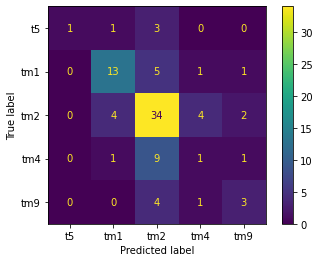

AdaBoost: score: 0.5304659498207885
Macro results: {'precision': 0.48690476190476184, 'recall': 0.41075757575757577, 'f1-score': 0.4302255639097744, 'support': 89}
Accuracy: 0.5842696629213483
balanced accuracy: 0.4488311688311688


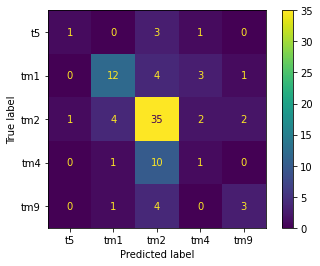

Naive Bayes: score: 0.1863799283154122
Macro results: {'precision': 0.37619047619047624, 'recall': 0.2790909090909091, 'f1-score': 0.16997802197802198, 'support': 89}
Accuracy: 0.15730337078651685
balanced accuracy: 0.3276406926406927


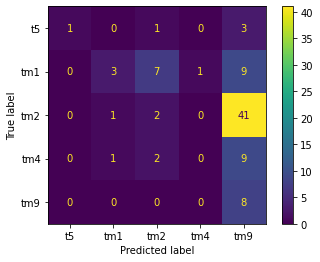

QDA: score: 0.35842293906810035
Macro results: {'precision': 0.3282913165266107, 'recall': 0.35545454545454547, 'f1-score': 0.2537240537240537, 'support': 89}
Accuracy: 0.39325842696629215
balanced accuracy: 0.3418729309905781


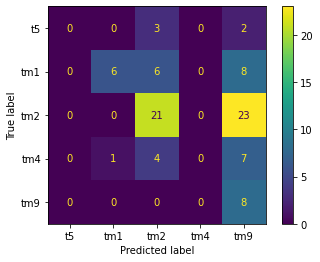

,model,precision,recall,accuracy,balanced_accuracy
0,Nearest Neighbors,0.649297,0.548939,0.662921,0.599118
1,Linear SVM,0.489170,0.320000,0.595506,0.404585
2,RBF SVM,0.482744,0.350909,0.617978,0.416827
3,Gaussian Process,0.289550,0.325455,0.629213,0.307502
4,Decision Tree,0.690702,0.580606,0.719101,0.635654
5,Random Forest,0.786380,0.548333,0.752809,0.667357
6,Neural Net,0.574764,0.416212,0.584270,0.495488
7,AdaBoost,0.486905,0.410758,0.584270,0.448831
8,Naive Bayes,0.376190,0.279091,0.157303,0.327641
9,QDA,0.328291,0.355455,0.393258,0.341873


In [79]:
#try the sklearn loop over different models

#MODEL TUNING DONE BASED ON THE TRAINING SET, NOT THE HOLDOUT SET

#Later in the notebook we will loop over the same models and test them on the holdout data

# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import warnings
warnings.filterwarnings('ignore')



names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
]

precisions = []
recalls = []
accuracies = []
balanced_accuracies = []

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=1, probability=True),
    SVC(kernel = 'rbf', gamma='auto', C=1, probability=True),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=10, max_features = 4),
    RandomForestClassifier(max_depth=10, n_estimators=10, max_features=4),
    MLPClassifier(hidden_layer_sizes=(20, 20), activation='relu', solver='adam', max_iter=10000, verbose = False, tol = .000001),
    AdaBoostClassifier(n_estimators = 30),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(reg_param=.1),
]


# iterate over classifiers
for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    preds_prob =  clf.predict_proba(X_test)
    print(f'{name}: score: {score}')


    model_test_df = df.query('roi_group_ID in @X_test_rois')

    model_test_df[['t5', 'tm1', 'tm2', 'tm4', 'tm9']] = preds_prob
    model_test_df = model_test_df.groupby(['roi_ID', 'label']).mean().reset_index()

    model_test_df['max_pred'] = model_test_df[['t5', 'tm1', 'tm2', 'tm4', 'tm9']].idxmax(axis=1)

    report = classification_report(model_test_df['label'],model_test_df['max_pred'], output_dict=True)

    precision = report['macro avg']['precision']
    recall = report['macro avg']['recall']
    accuracy = report['accuracy']
    balanced_accuracy = (report['macro avg']['precision'] + report['macro avg']['recall']) /2


    precisions.append(precision)
    recalls.append(recall)
    accuracies.append(accuracy)
    balanced_accuracies.append(balanced_accuracy)


    print(f"Macro results: {report['macro avg']}")
    print(f"Accuracy: {accuracy}")
    print(f"balanced accuracy: {balanced_accuracy}")

    ConfusionMatrixDisplay.from_predictions(model_test_df['label'],model_test_df['max_pred'])

    plt.show()

test_results = pd.DataFrame(data = {'model': names,
                                    'precision': precisions,
                                    'recall': recalls,
                                    'accuracy': accuracies,
                                    'balanced_accuracy': balanced_accuracies})
test_results

Nearest Neighbors
Macro results: {'precision': 0.2564102564102564, 'recall': 0.3, 'f1-score': 0.2666666666666667, 'support': 17}
Accuracy: 0.5882352941176471
balanced accuracy: 0.2782051282051282


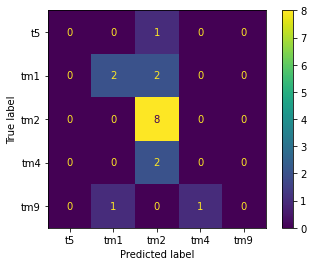

Linear SVM
Macro results: {'precision': 0.27999999999999997, 'recall': 0.3, 'f1-score': 0.2782051282051282, 'support': 17}
Accuracy: 0.35294117647058826
balanced accuracy: 0.29


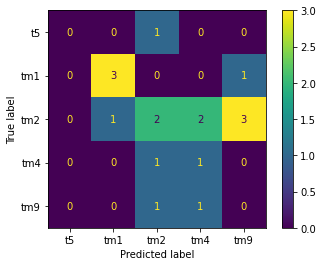

RBF SVM
Macro results: {'precision': 0.158974358974359, 'recall': 0.2, 'f1-score': 0.17142857142857143, 'support': 17}
Accuracy: 0.4117647058823529
balanced accuracy: 0.17948717948717952


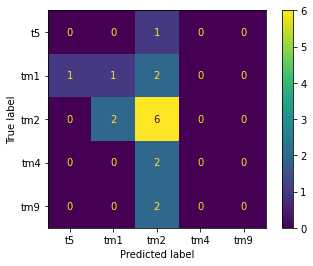

Gaussian Process
Macro results: {'precision': 0.2333333333333333, 'recall': 0.275, 'f1-score': 0.24155844155844158, 'support': 17}
Accuracy: 0.5294117647058824
balanced accuracy: 0.25416666666666665


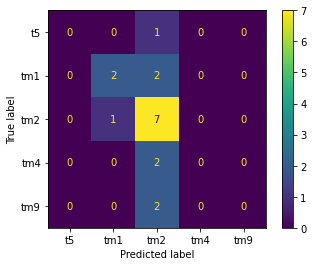

Decision Tree
Macro results: {'precision': 0.3333333333333333, 'recall': 0.425, 'f1-score': 0.3013986013986014, 'support': 17}
Accuracy: 0.4117647058823529
balanced accuracy: 0.37916666666666665


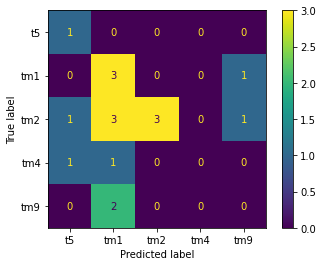

Random Forest
Macro results: {'precision': 0.509090909090909, 'recall': 0.55, 'f1-score': 0.49298245614035086, 'support': 17}
Accuracy: 0.5882352941176471
balanced accuracy: 0.5295454545454545


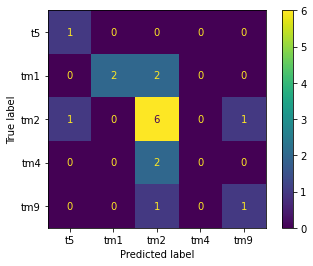

Neural Net
Macro results: {'precision': 0.2333333333333333, 'recall': 0.25, 'f1-score': 0.2342857142857143, 'support': 17}
Accuracy: 0.47058823529411764
balanced accuracy: 0.24166666666666664


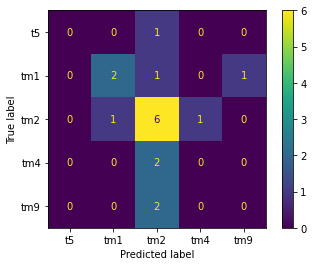

AdaBoost
Macro results: {'precision': 0.27999999999999997, 'recall': 0.15, 'f1-score': 0.16888888888888892, 'support': 17}
Accuracy: 0.29411764705882354
balanced accuracy: 0.21499999999999997


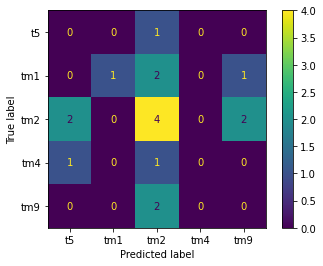

Naive Bayes
Macro results: {'precision': 0.05, 'recall': 0.2, 'f1-score': 0.08, 'support': 17}
Accuracy: 0.23529411764705882
balanced accuracy: 0.125


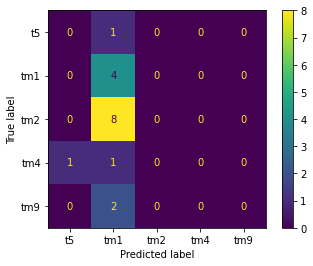

QDA
Macro results: {'precision': 0.42727272727272725, 'recall': 0.475, 'f1-score': 0.4140350877192982, 'support': 17}
Accuracy: 0.6470588235294118
balanced accuracy: 0.4511363636363636


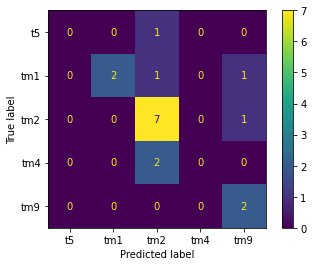

,model,precision,recall,accuracy,balanced_accuracy
0,Nearest Neighbors,0.256410,0.300,0.588235,0.278205
1,Linear SVM,0.280000,0.300,0.352941,0.290000
2,RBF SVM,0.158974,0.200,0.411765,0.179487
3,Gaussian Process,0.233333,0.275,0.529412,0.254167
4,Decision Tree,0.333333,0.425,0.411765,0.379167
5,Random Forest,0.509091,0.550,0.588235,0.529545
6,Neural Net,0.233333,0.250,0.470588,0.241667
7,AdaBoost,0.280000,0.150,0.294118,0.215000
8,Naive Bayes,0.050000,0.200,0.235294,0.125000
9,QDA,0.427273,0.475,0.647059,0.451136


In [81]:
#USING THE SAME MODEL HYPERPARAMETERS, FIT MODELS AND TEST ON HOLDOUT DATA

# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import warnings
warnings.filterwarnings('ignore')



names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
]

precisions = []
recalls = []
accuracies = []
balanced_accuracies = []

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=1, probability=True),
    SVC(kernel = 'rbf', gamma='auto', C=1, probability=True),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=10, max_features = 4),
    RandomForestClassifier(max_depth=10, n_estimators=10, max_features=4),
    MLPClassifier(hidden_layer_sizes=(20, 20), activation='relu', solver='adam', max_iter=10000, verbose = False, tol = .000001),
    AdaBoostClassifier(n_estimators = 30),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(reg_param=.1),
]


# iterate over classifiers
for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    preds_prob =  clf.predict_proba(X_holdout)


    model_test_df = holdout_df

    model_test_df[['t5', 'tm1', 'tm2', 'tm4', 'tm9']] = preds_prob
    model_test_df = model_test_df.groupby(['roi_ID', 'label']).mean().reset_index()

    model_test_df['max_pred'] = model_test_df[['t5', 'tm1', 'tm2', 'tm4', 'tm9']].idxmax(axis=1)

    report = classification_report(model_test_df['label'],model_test_df['max_pred'], output_dict=True)

    precision = report['macro avg']['precision']
    recall = report['macro avg']['recall']
    accuracy = report['accuracy']
    balanced_accuracy = (report['macro avg']['precision'] + report['macro avg']['recall']) /2


    precisions.append(precision)
    recalls.append(recall)
    accuracies.append(accuracy)
    balanced_accuracies.append(balanced_accuracy)

    print(name)
    print(f"Macro results: {report['macro avg']}")
    print(f"Accuracy: {accuracy}")
    print(f"balanced accuracy: {balanced_accuracy}")

    ConfusionMatrixDisplay.from_predictions(model_test_df['label'],model_test_df['max_pred'])

    plt.show()

test_results = pd.DataFrame(data = {'model': names,
                                    'precision': precisions,
                                    'recall': recalls,
                                    'accuracy': accuracies,
                                    'balanced_accuracy': balanced_accuracies})
test_results

# Old code to take frame-level predictions and use the most frequent prediction at the roi level

In [25]:
# #groupby the roi_id and predicted class to see the number of times each cell was predicted which class
# #right now it classifies everything as tm1
# max_preds = test_df.groupby(['roi_ID', 'pred']).count() \
#     .reset_index() \
#     .sort_values(['roi_ID', 'label'], ascending = False) \
#     .drop_duplicates('roi_ID', keep='first') \
#     [['roi_ID', 'pred']] \
#     .rename(columns = {'pred': 'most_predicted_class'}) \
#     .set_index('roi_ID')


In [26]:
# max_preds.head()

In [27]:
# #get the actual labels for the rois in the test set
# test_labels = test_df[['roi_ID', 'label']].drop_duplicates('roi_ID').set_index('roi_ID')
# test_labels.head()

In [28]:
# #join the actual labels to the most predicted class labels
# max_preds = max_preds.join(test_labels)
# max_preds.head()

In [29]:
# #show the confusion matrix for the test set rois
# print(classification_report(max_preds['label'], max_preds['most_predicted_class']))
# ConfusionMatrixDisplay.from_predictions(max_preds['label'], max_preds['most_predicted_class'])

In [30]:
# #return the predicted classes and probabilities
# preds_prob = model.predict_proba(X_test)
# preds = model.predict(X_test)
# print(model.classes_)
# preds_prob

In [31]:
# #add the classes and probabilities back to the df of test set records
# test_df = df.query('roi_ID in @X_test_rois')
# test_df[['t5', 'tm1', 'tm2', 'tm4', 'tm9']] = preds_prob
# test_df['pred'] = preds

In [32]:
# #groupby the roi_id and predicted class to see the number of times each cell was predicted which class
# #right now it classifies everything as tm1
# max_preds = test_df.groupby(['roi_ID', 'pred']).count() \
#     .reset_index() \
#     .sort_values(['roi_ID', 'label'], ascending = False) \
#     .drop_duplicates('roi_ID', keep='first') \
#     [['roi_ID', 'pred']] \
#     .rename(columns = {'pred': 'most_predicted_class'}) \
#     .set_index('roi_ID')


In [33]:
# max_preds.head()

In [34]:
# #get the actual labels for the rois in the test set
# test_labels = test_df[['roi_ID', 'label']].drop_duplicates('roi_ID').set_index('roi_ID')
# test_labels.head()

In [35]:
# #join the actual labels to the most predicted class labels
# max_preds = max_preds.join(test_labels)
# max_preds.head()

In [36]:
# #show the confusion matrix for the test set rois
# ConfusionMatrixDisplay.from_predictions(max_preds['label'], max_preds['most_predicted_class'])